Let's see our train.csv to see what we are dealing with!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import xgboost as xgb

In [2]:
train_df = pd.read_csv('./datasets/train.csv', index_col='id')
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


# **Data Cleaning**

We find that there a lot of object columns with a number of missing (NaN) values. This next section will explore data to clean and make values possible to provide meaningful parameters in our model. This includes: 
- Dropping unneccessary columns
- Converting columns that have non-numerical datatypes to numerical datatypes for analysis.
- Dropping/imputing NaN values  

In [4]:
# Number of missing values (NaN)
train_df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [5]:
unique_counts = train_df.nunique()
unique_counts

brand             57
model           1897
model_year        34
milage          6651
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [6]:
# The misspelling really annoyed me :D
train_df.rename(columns={"milage":"mileage"}, inplace=True)
train_df

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900


## Transmission

Let's explore the different types of transmission types in this data types and try to catergorize the many types into a few broad catergories.

In [7]:
train_df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


We can classify the broad catergories as follows:
- **Automatic**
- **Manual**
- **CVT**
- **Dual** (For electric vehicles)
- **Other** (This will be to cover all those transmission descriptions so that we don't ignore/drop such rows)

In [8]:
# Defining function to catergorize transmission
def catergorize_transmission(transmission):
    if 'A/T' in transmission or 'Automatic' in transmission:
        return 'Automatic'
    elif 'M/T' in transmission or 'Manual' in transmission:
        return 'Manual'
    elif 'CVT' in transmission:
        return 'CVT'
    elif 'Dual' in transmission:
        return 'Dual'
    else:
        return 'Other'

In [9]:
train_df['transmission_cat'] = train_df['transmission'].apply(catergorize_transmission)
train_df.head()

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_cat
id,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Dual
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic


In [10]:
train_df['transmission_cat'].unique()

array(['Automatic', 'Dual', 'CVT', 'Manual', 'Other'], dtype=object)

In [11]:
transmission_map = {
    "Automatic" : 0,
    "Dual" : 1,
    "CVT" : 2,
    "Manual" : 3,
    "Other" : 4
}

train_df["transmission_cat"] = train_df['transmission_cat'].map(transmission_map)
train_df.head(5)

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_cat
id,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,1
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,0


In [12]:
train_df = train_df.drop(columns='transmission')
train_df.head(5)

,brand,model,model_year,mileage,fuel_type,engine,ext_col,int_col,accident,clean_title,price,transmission_cat
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Yellow,Gray,None reported,Yes,4200,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Silver,Beige,At least 1 accident or damage reported,Yes,4999,0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Blue,Gray,None reported,Yes,13900,0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Black,Black,None reported,Yes,45000,1
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Black,Beige,None reported,Yes,97500,0


## Engine

The engine descrptions are the most useful in this dataset that can help us obtain vital information for building our model, i.e, **Horsepower**, **Engine Size**, **Fuel Type**. 

Our existing 'fuel_type' column has many missing/NaN data points. Since our engine description covers what fuel is used, we can save operations on imputing values to 'fuel_type' and perform regex to extract our data and store them in appopriate columns. 

In [13]:
import re

def extract_engine_features(engine_str):
    
    hp_match = re.search(r'(\d+\.\d+)HP', engine_str)
    horsepower = float(hp_match.group(1)) if hp_match else None
    
    
    engine_size_match = re.search(r'(\d+\.\d+)L', engine_str)
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None
    
   
    fuel_type_match = re.search(r'(Gasoline|Flex Fuel|Electric)', engine_str)
    fuel_type = fuel_type_match.group(0) if fuel_type_match else None
    
    return horsepower, engine_size, fuel_type

In [14]:
train_df[['horsepower', 'engine_size', 'type_of_fuel']] = train_df['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))
train_df = train_df.drop(columns=['fuel_type','engine'])
train_df.head(4)

,brand,model,model_year,mileage,ext_col,int_col,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel
id,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Yellow,Gray,None reported,Yes,4200,0,172.0,1.6,Gasoline
1,Lincoln,LS V8,2002,143250,Silver,Beige,At least 1 accident or damage reported,Yes,4999,0,252.0,3.9,Gasoline
2,Chevrolet,Silverado 2500 LT,2002,136731,Blue,Gray,None reported,Yes,13900,0,320.0,5.3,Flex Fuel
3,Genesis,G90 5.0 Ultimate,2017,19500,Black,Black,None reported,Yes,45000,1,420.0,5.0,Gasoline


## Clean Title

Clean title gives vehicles to have a higher resale value as it was certified to have little to no damges or have not been declared a total loss by an insurance company. Other vehicle titles are as follows:

- **Rebuilt Title**: Issued when a vehicle has been significantly rebuilt after being declared a total loss.
- **Salvage Title**: Issued when a vehicle has been declared a total loss by an insurance company due to damage that's more expensive to repair than the car's value.

We will **assume** here that the NaN in 'clean_title' are either rebuilt titles and possibly missing information and so we will impute them with *No*

In [15]:
train_df.fillna({'clean_title':'No'}, inplace=True)

train_df['clean_title'] = train_df['clean_title'].map({'Yes': 1, 'No': 0})

In [16]:
train_df['clean_title']

id
0         1
1         1
2         1
3         1
4         1
         ..
188528    1
188529    1
188530    1
188531    0
188532    1
Name: clean_title, Length: 188533, dtype: int64

## Accident

In [17]:
train_df['accident'] = train_df['accident'].map({'At least 1 accident or damage reported': 1,'None reported': 0})
train_df.head(5)

,brand,model,model_year,mileage,ext_col,int_col,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel
id,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Yellow,Gray,0.0,1,4200,0,172.0,1.6,Gasoline
1,Lincoln,LS V8,2002,143250,Silver,Beige,1.0,1,4999,0,252.0,3.9,Gasoline
2,Chevrolet,Silverado 2500 LT,2002,136731,Blue,Gray,0.0,1,13900,0,320.0,5.3,Flex Fuel
3,Genesis,G90 5.0 Ultimate,2017,19500,Black,Black,0.0,1,45000,1,420.0,5.0,Gasoline
4,Mercedes-Benz,Metris Base,2021,7388,Black,Beige,0.0,1,97500,0,208.0,2.0,Gasoline


## Brand

In [18]:
train_df['brand'].unique()


array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [19]:
luxury_brands = ['Bugatti', 'Ferrari', 'McLaren', 'Lamborghini', 'Maybach', 'Rolls-Royce', 'Karma', 'Maserati', 'Lotus', 'Alfa', 'Polestar', 'Porsche']

premium_brands = ['Lincoln', 'Genesis', 'Mercedes-Benz', 'Audi', 'Cadillac', 'Land', 'GMC', 'Buick', 'Rivian', 'Dodge', 'Lexus', 'Jaguar', 'Bentley', 'Aston',
                   'Chrysler', 'Lucid', 'Tesla']

mass_market_brands = ['MINI', 'Chevrolet', 'Ford', 'BMW', 'Toyota', 'Hyundai', 'Volvo', 'Volkswagen', 'RAM', 'Hummer', 'INFINITI', 'Jeep', 'Honda', 'Nissan', 
                      'Acura', 'Kia', 'Mitsubishi', 'Pontiac', 'Saturn', 'Mazda', 'Subaru', 'Scion', 'smart', 'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Mercury']

In [20]:
def classify_brand(brand):
    if brand in luxury_brands:
        return 1
    elif brand in premium_brands:
        return 2
    elif brand in mass_market_brands:
        return 3

In [21]:
train_df['brand_cat'] = train_df['brand'].apply(classify_brand)

In [22]:
train_df = train_df.drop(['brand', 'model'], axis=1)
train_df.head(5)

,model_year,mileage,ext_col,int_col,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat
id,,,,,,,,,,,,
0,2007,213000,Yellow,Gray,0.0,1,4200,0,172.0,1.6,Gasoline,3
1,2002,143250,Silver,Beige,1.0,1,4999,0,252.0,3.9,Gasoline,2
2,2002,136731,Blue,Gray,0.0,1,13900,0,320.0,5.3,Flex Fuel,3
3,2017,19500,Black,Black,0.0,1,45000,1,420.0,5.0,Gasoline,2
4,2021,7388,Black,Beige,0.0,1,97500,0,208.0,2.0,Gasoline,2


## Model Year

Let's convert the model year to be reflect the age of the car by subtracting it from the current year (2024)

In [23]:
current_year = 2024

train_df['age'] = train_df['model_year'].apply(lambda x: current_year - x)
train_df.head(5)

,model_year,mileage,ext_col,int_col,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,,,,,
0,2007,213000,Yellow,Gray,0.0,1,4200,0,172.0,1.6,Gasoline,3,17
1,2002,143250,Silver,Beige,1.0,1,4999,0,252.0,3.9,Gasoline,2,22
2,2002,136731,Blue,Gray,0.0,1,13900,0,320.0,5.3,Flex Fuel,3,22
3,2017,19500,Black,Black,0.0,1,45000,1,420.0,5.0,Gasoline,2,7
4,2021,7388,Black,Beige,0.0,1,97500,0,208.0,2.0,Gasoline,2,3


In [24]:
train_df = train_df.drop(['model_year', 'ext_col', 'int_col'], axis=1)
train_df

,mileage,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,,
0,213000,0.0,1,4200,0,172.0,1.6,Gasoline,3,17
1,143250,1.0,1,4999,0,252.0,3.9,Gasoline,2,22
2,136731,0.0,1,13900,0,320.0,5.3,Flex Fuel,3,22
3,19500,0.0,1,45000,1,420.0,5.0,Gasoline,2,7
4,7388,0.0,1,97500,0,208.0,2.0,Gasoline,2,3
...,...,...,...,...,...,...,...,...,...,...
188528,49000,0.0,1,27500,1,420.0,6.2,Gasoline,2,7
188529,28600,1.0,1,30000,0,385.0,3.0,Gasoline,2,6
188530,13650,0.0,1,86900,0,469.0,4.0,Gasoline,2,3


In [25]:
train_df = train_df.dropna()
train_df

,mileage,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,,
0,213000,0.0,1,4200,0,172.0,1.6,Gasoline,3,17
1,143250,1.0,1,4999,0,252.0,3.9,Gasoline,2,22
2,136731,0.0,1,13900,0,320.0,5.3,Flex Fuel,3,22
3,19500,0.0,1,45000,1,420.0,5.0,Gasoline,2,7
4,7388,0.0,1,97500,0,208.0,2.0,Gasoline,2,3
...,...,...,...,...,...,...,...,...,...,...
188527,110000,0.0,1,14500,0,310.0,5.7,Gasoline,3,25
188528,49000,0.0,1,27500,1,420.0,6.2,Gasoline,2,7
188529,28600,1.0,1,30000,0,385.0,3.0,Gasoline,2,6


In [26]:
train_df['type_of_fuel'].unique()

array(['Gasoline', 'Flex Fuel', 'Electric'], dtype=object)

In [27]:
fuel_type_mapping = {
    "Gasoline" : 0,
    "Flex Fuel" : 1,
    "Electric" : 2
}

train_df['type_of_fuel'] = train_df['type_of_fuel'].map(fuel_type_mapping)

C:\Users\Anees' Laptop\AppData\Local\Temp\ipykernel_10844\2930474992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['type_of_fuel'] = train_df['type_of_fuel'].map(fuel_type_mapping)


In [28]:
train_df.head()

,mileage,accident,clean_title,price,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,,
0,213000,0.0,1,4200,0,172.0,1.6,0,3,17
1,143250,1.0,1,4999,0,252.0,3.9,0,2,22
2,136731,0.0,1,13900,0,320.0,5.3,1,3,22
3,19500,0.0,1,45000,1,420.0,5.0,0,2,7
4,7388,0.0,1,97500,0,208.0,2.0,0,2,3


# Data Visualization & Model Preprocessing

In [29]:
corr = train_df.corr()

<Axes: >

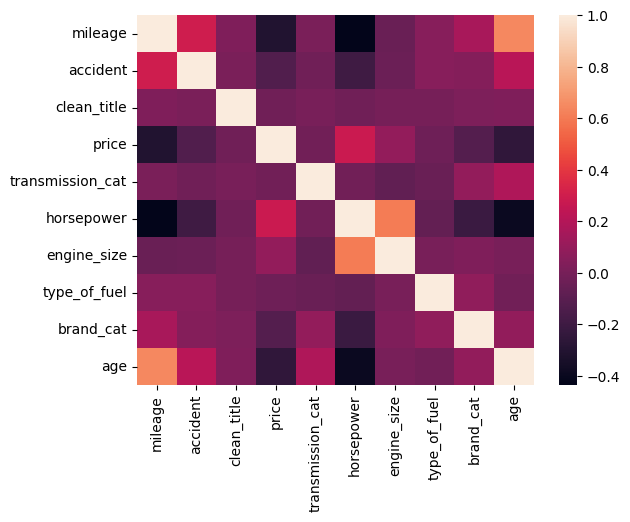

In [30]:
import seaborn as sns

sns.heatmap(data=corr)

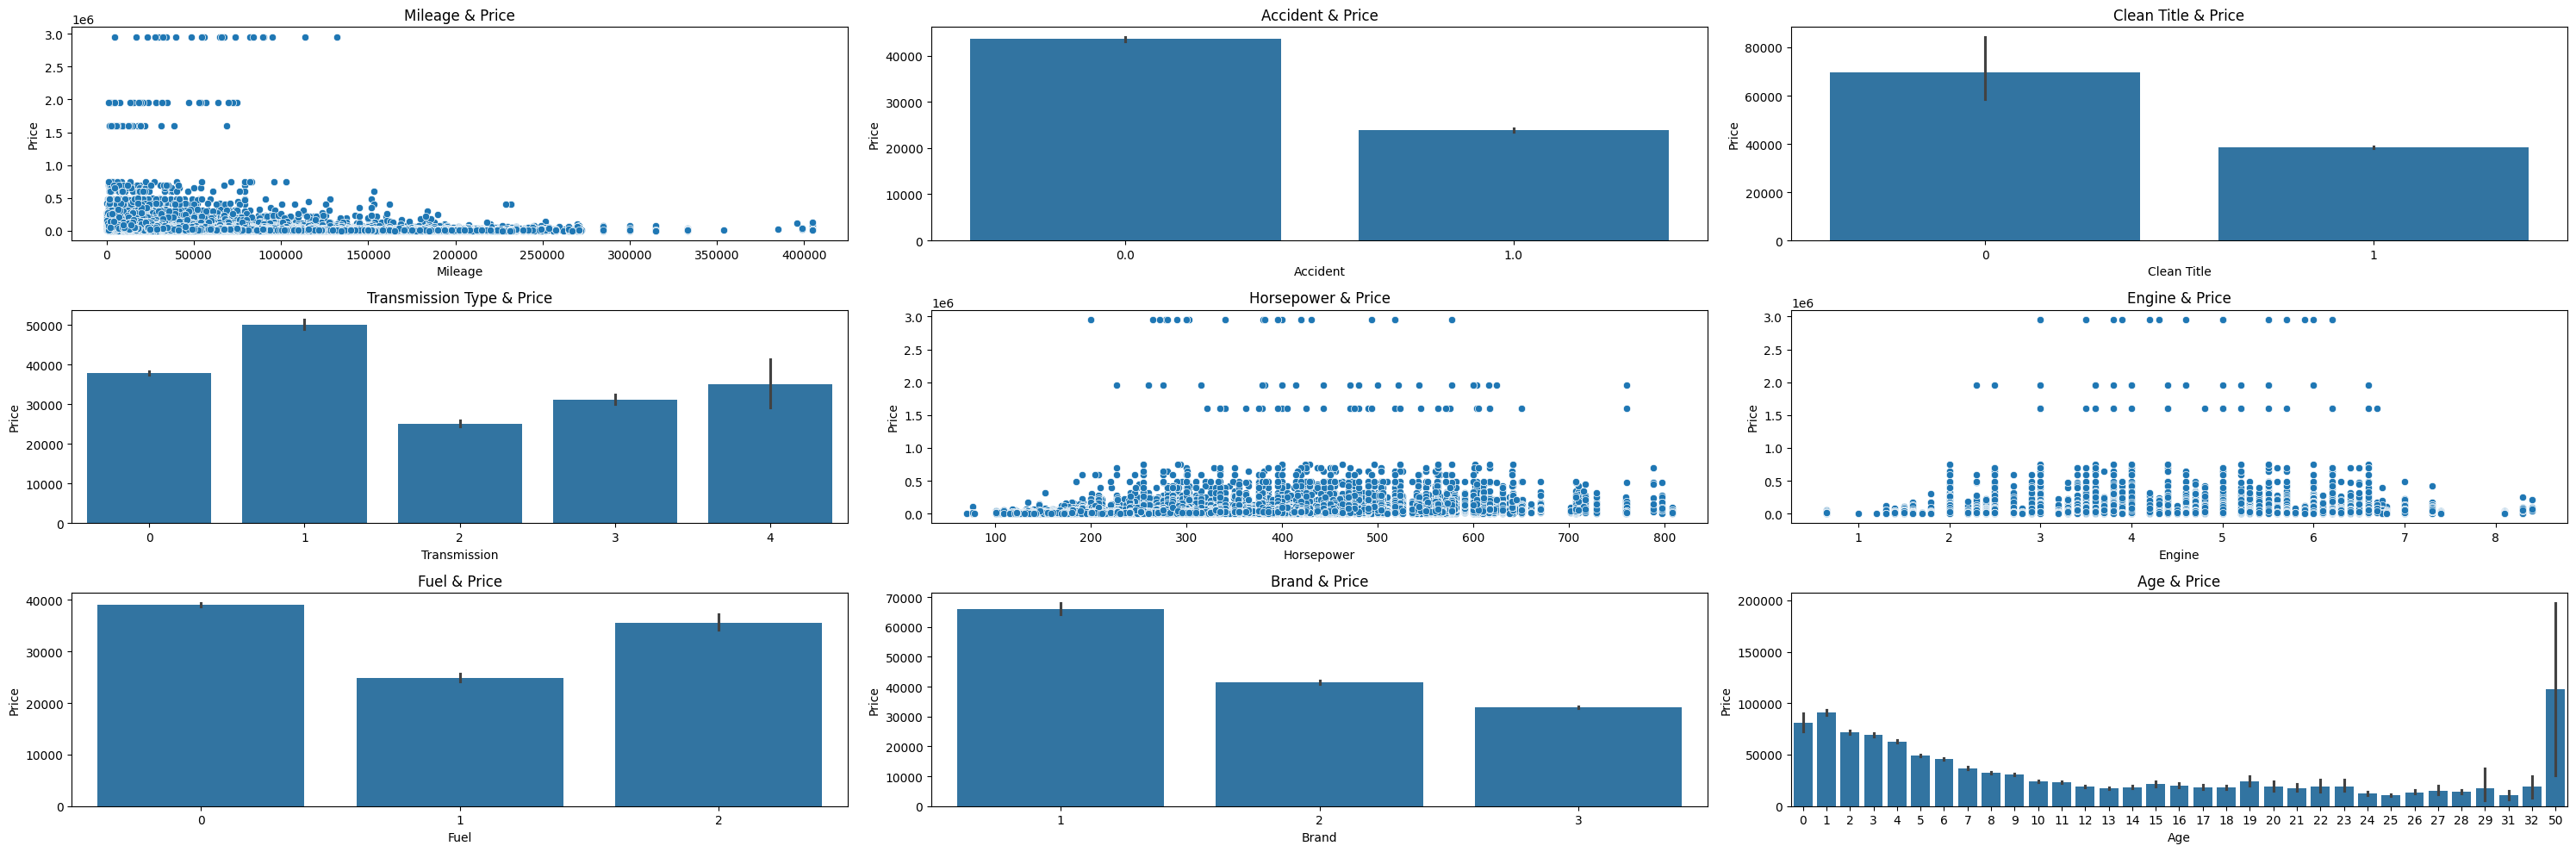

In [31]:
fig, axs = plt.subplots(3,3, figsize=(30,10))

sns.scatterplot(x='mileage', y='price', data=train_df, ax=axs[0, 0])
axs[0, 0].set_title('Mileage & Price')
axs[0, 0].set_xlabel('Mileage')
axs[0, 0].set_ylabel('Price')


sns.barplot(x='accident', y='price', data=train_df, ax=axs[0, 1])
axs[0, 1].set_title('Accident & Price')
axs[0, 1].set_xlabel('Accident')
axs[0, 1].set_ylabel('Price')

sns.barplot(x='clean_title', y='price', data=train_df, ax=axs[0, 2])
axs[0, 2].set_title('Clean Title & Price')
axs[0, 2].set_xlabel('Clean Title')
axs[0, 2].set_ylabel('Price')

sns.barplot(x='transmission_cat', y='price', data=train_df, ax=axs[1, 0])
axs[1, 0].set_title('Transmission Type & Price')
axs[1, 0].set_xlabel('Transmission')
axs[1, 0].set_ylabel('Price')

sns.scatterplot(x='horsepower', y='price', data=train_df, ax=axs[1, 1])
axs[1, 1].set_title('Horsepower & Price')
axs[1, 1].set_xlabel('Horsepower')
axs[1, 1].set_ylabel('Price')

sns.scatterplot(x='engine_size', y='price', data=train_df, ax=axs[1, 2])
axs[1, 2].set_title('Engine & Price')
axs[1, 2].set_xlabel('Engine')
axs[1, 2].set_ylabel('Price')

sns.barplot(x='type_of_fuel', y='price', data=train_df, ax=axs[2, 0])
axs[2, 0].set_title('Fuel & Price')
axs[2, 0].set_xlabel('Fuel')
axs[2, 0].set_ylabel('Price')

sns.barplot(x='brand_cat', y='price', data=train_df, ax=axs[2, 1])
axs[2, 1].set_title('Brand & Price')
axs[2, 1].set_xlabel('Brand')
axs[2, 1].set_ylabel('Price')

sns.barplot(x='age', y='price', data=train_df, ax=axs[2, 2])
axs[2, 2].set_title('Age & Price')
axs[2, 2].set_xlabel('Age')
axs[2, 2].set_ylabel('Price')


plt.tight_layout()
plt.show()



# Model Building

In [32]:
X = train_df.drop(columns='price')
y = train_df.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

params = {"objective" : "reg:squarederror", "tree_method" : "hist", "device" : "cuda"}

evals = [(dtrain_reg, 'train'), (dtest_reg, 'eval')]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=500,
    evals=evals,
    verbose_eval=25,
    early_stopping_rounds=25,
)

[0]	train-rmse:62669.11827	eval-rmse:69190.64121
[25]	train-rmse:54807.58416	eval-rmse:67609.14455
[32]	train-rmse:53752.20089	eval-rmse:67991.76660


In [34]:
preds = xgb_model.predict(dtest_reg)

rmse_xgb = root_mean_squared_error(y_test, preds)
print(f"RMSE: {rmse_xgb}")

RMSE: 68025.28446894241


# Predictions with Test File

In [35]:
test_df = pd.read_csv('./datasets/test.csv', index_col='id')
test_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


### Cleaning and Model Preprocessing

In [36]:
test_df['transmission_cat'] = test_df['transmission'].apply(catergorize_transmission)
test_df["transmission_cat"] = test_df['transmission_cat'].map(transmission_map)
test_df = test_df.drop(columns='transmission')
test_df.head()

,brand,model,model_year,milage,fuel_type,engine,ext_col,int_col,accident,clean_title,transmission_cat
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,White,Beige,None reported,Yes,0
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Silver,Black,None reported,Yes,0
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,White,Ebony,None reported,NaN,0
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Silician Yellow,Black,None reported,NaN,0
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Gray,Black,None reported,Yes,0


In [37]:
test_df[['horsepower', 'engine_size', 'type_of_fuel']] = test_df['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))
test_df = test_df.drop(columns=['fuel_type','engine'])
test_df.head()

,brand,model,model_year,milage,ext_col,int_col,accident,clean_title,transmission_cat,horsepower,engine_size,type_of_fuel
id,,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,White,Beige,None reported,Yes,0,240.0,2.0,Gasoline
188534,Land,Rover Defender SE,2020,9142,Silver,Black,None reported,Yes,0,395.0,3.0,Gasoline
188535,Ford,Expedition Limited,2022,28121,White,Ebony,None reported,NaN,0,NaN,3.5,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Silician Yellow,Black,None reported,NaN,0,NaN,NaN,None
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gray,Black,None reported,Yes,0,252.0,2.0,Gasoline


In [38]:
# Clean Title
test_df.fillna({'clean_title':'No'}, inplace=True)
test_df['clean_title'] = test_df['clean_title'].map({'Yes': 1, 'No': 0})

# Accident
test_df['accident'] = test_df['accident'].map({'At least 1 accident or damage reported': 1,'None reported': 0})

In [39]:
test_df['brand_cat'] = test_df['brand'].apply(classify_brand)
test_df = test_df.drop(['brand', 'model'], axis=1)

In [40]:
test_df['age'] = test_df['model_year'].apply(lambda x: current_year - x)
test_df = test_df.drop(['model_year', 'ext_col', 'int_col'], axis=1)
test_df.head()

,milage,accident,clean_title,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,
188533,98000,0.0,1,0,240.0,2.0,Gasoline,2,9
188534,9142,0.0,1,0,395.0,3.0,Gasoline,2,4
188535,28121,0.0,0,0,NaN,3.5,NaN,3,2
188536,61258,0.0,0,0,NaN,NaN,None,2,8
188537,59000,0.0,1,0,252.0,2.0,Gasoline,2,6


In [41]:
test_df.dropna(inplace=True)

In [42]:
test_df['type_of_fuel'] = test_df['type_of_fuel'].map(fuel_type_mapping)
test_df.head()

,milage,accident,clean_title,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age
id,,,,,,,,,
188533,98000,0.0,1,0,240.0,2.0,0,2,9
188534,9142,0.0,1,0,395.0,3.0,0,2,4
188537,59000,0.0,1,0,252.0,2.0,0,2,6
188538,99524,0.0,1,0,285.0,4.8,0,3,11
188539,194000,0.0,1,1,270.0,3.5,0,2,16


In [43]:
test_df.rename({'milage':'mileage'}, axis=1, inplace=True)

In [44]:
predictions = xgb_model.predict(xgb.DMatrix(test_df))
test_df['predicted_price'] = predictions
test_df.head()

,mileage,accident,clean_title,transmission_cat,horsepower,engine_size,type_of_fuel,brand_cat,age,predicted_price
id,,,,,,,,,,
188533,98000,0.0,1,0,240.0,2.0,0,2,9,17731.398438
188534,9142,0.0,1,0,395.0,3.0,0,2,4,91072.406250
188537,59000,0.0,1,0,252.0,2.0,0,2,6,30460.425781
188538,99524,0.0,1,0,285.0,4.8,0,3,11,17382.080078
188539,194000,0.0,1,1,270.0,3.5,0,2,16,12400.548828


In [48]:
test_df.to_csv('test_predictions.csv', index=True)